In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = '/content/drive/MyDrive/MSIB/14. Case Study Industri (Customer Segmentation)/'

In [4]:
FCMG_data = pd.read_csv(path+'data.csv', encoding = "ISO-8859-1")

In [5]:
FCMG_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
# Convert InvoiceDate from object to datetime format
FCMG_data['InvoiceDate'] = pd.to_datetime(FCMG_data['InvoiceDate'])

In [7]:
missing_values_count = FCMG_data.isnull().sum()

print(missing_values_count[missing_values_count > 0])

Description      1454
CustomerID     135080
dtype: int64


In [8]:

print('{:,} rows; {:,} columns'
      .format(FCMG_data.shape[0], FCMG_data.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(FCMG_data[FCMG_data.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(FCMG_data['InvoiceDate'].min(),
                                    FCMG_data['InvoiceDate'].max()))

541,909 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [9]:
# Drop NA values from online
FCMG_data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# --Group data by customerID--
# Create TotalSum column for online dataset
FCMG_data['TotalSum'] = FCMG_data['Quantity'] * FCMG_data['UnitPrice']

In [11]:
# Create snapshot date
snapshot_date = FCMG_data['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [12]:
# Grouping by CustomerID
FMCG_Preprocess = FCMG_data.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [13]:
# Rename the columns 
FMCG_Preprocess.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [14]:
# Print top 5 rows and shape of dataframe
print(FMCG_Preprocess.head())
print('{:,} rows; {:,} columns'
      .format(FMCG_Preprocess.shape[0], FMCG_Preprocess.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
4,372 rows; 3 columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

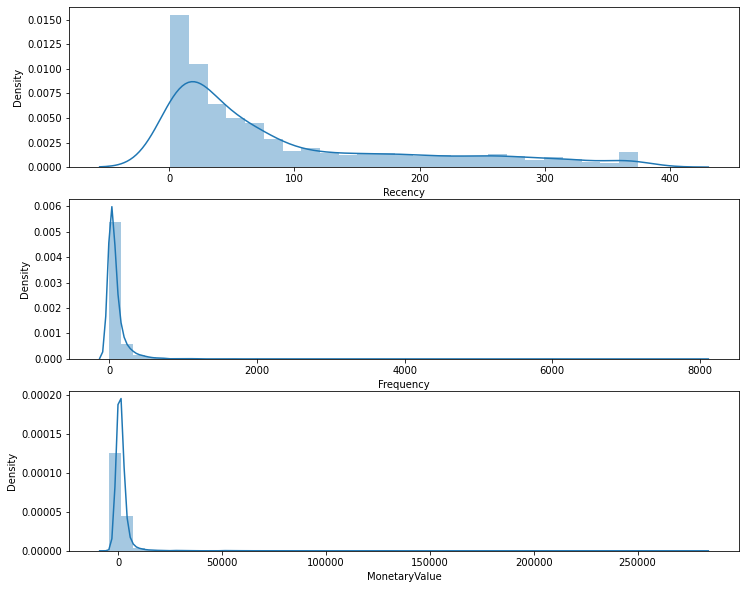

In [15]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(FMCG_Preprocess['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(FMCG_Preprocess['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(FMCG_Preprocess['MonetaryValue'])
# Show the plot
plt.show()

In [16]:
#Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(FMCG_Preprocess['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(FMCG_Preprocess['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
FMCG_Preprocess = FMCG_Preprocess.assign(R = r_groups.values, F = f_groups.values)
FMCG_Preprocess.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [17]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(FMCG_Preprocess['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
FMCG_Preprocess = FMCG_Preprocess.assign(M = m_groups.values)
FMCG_Preprocess.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [18]:
# Concating the RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
FMCG_Preprocess['RFM_Segment_Concat'] = FMCG_Preprocess.apply(join_rfm, axis=1)
FMCG_rfm = FMCG_Preprocess
FMCG_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0


In [19]:
# Count num of unique segments
FMCG_rfm_count_unique = FMCG_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(FMCG_rfm_count_unique.sum())

62


In [20]:
# Calculate RFM_Score
FMCG_rfm['RFM_Score'] = FMCG_rfm[['R','F','M']].sum(axis=1)
print(FMCG_rfm['RFM_Score'].head())

CustomerID
12346.0     3
12347.0    12
12348.0     8
12349.0    10
12350.0     4
Name: RFM_Score, dtype: int64


In [21]:
# Define FMCG_rfm_level function
def FMCG_rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
FMCG_rfm['RFM_Level'] = FMCG_rfm.apply(FMCG_rfm_level, axis=1)
# Printing the header with top 15 rows 
FMCG_rfm.head(15)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Demands Activation
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Champions
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Requires Attention
12352.0,36,95,1545.41,3,3,3,3.03.03.0,9,Can't Loose Them
12353.0,204,4,89.00,1,1,1,1.01.01.0,3,Demands Activation
12354.0,232,58,1079.40,1,3,3,1.03.03.0,7,Loyal/Commited
12355.0,214,13,459.40,1,1,2,1.01.02.0,4,Requires Attention


In [22]:
# Calculate average values for each RFM_Level, and return a size of each segment 
FMCG_rfm_level_agg = FMCG_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(FMCG_rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Demands Activation   264.8       7.8         109.1   392
Loyal/Commited        78.8      39.7         724.2   447
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Requires Attention   174.5      13.9         227.1   391


In [23]:
import squarify


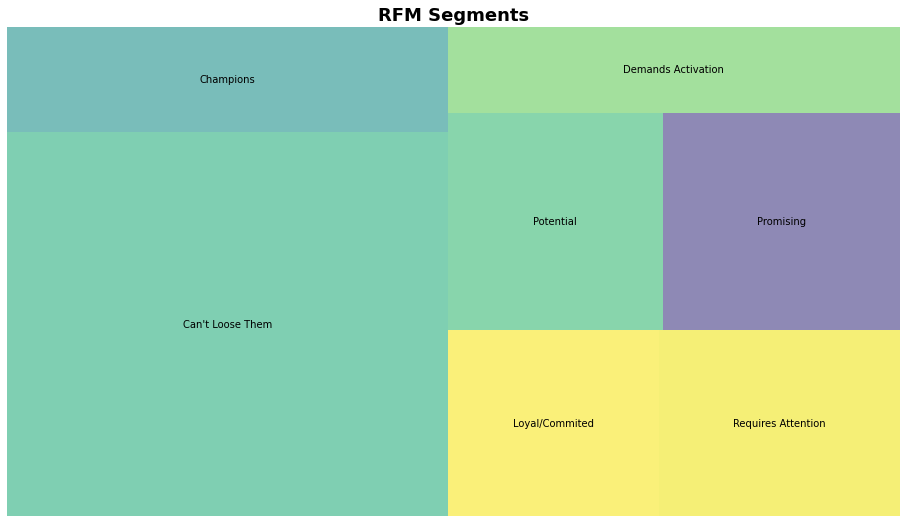

In [24]:

FMCG_rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=FMCG_rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal/Commited',
                     'Requires Attention',
                     'Potential', 
                     'Promising', 
                     'Demands Activation'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()